In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_circles
features, Labels = make_circles(n_samples=1000,random_state=42,noise=0.03)

In [3]:
data = pd.DataFrame({'X0':features[:,0],'X1':features[:,1], 'labels':Labels})
data.head(6)

,X0,X1,labels
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1


In [4]:
features[:10]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343],
       [-0.47964637,  0.67643477],
       [-0.01364836,  0.80334872],
       [ 0.77151327,  0.14775959],
       [-0.16932234, -0.79345575],
       [-0.1214858 ,  1.02150905]])

In [5]:
Labels[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

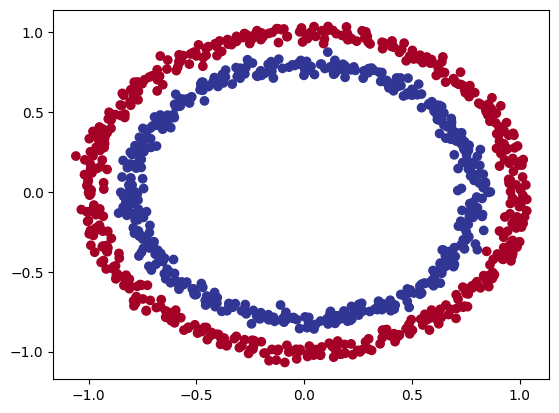

In [6]:
plt.scatter(features[:, 0],features[:, 1], c=Labels, cmap=plt.cm.RdYlBu)

In [7]:
features[0].shape,Labels[1].shape

((2,), ())

In [8]:
import tensorflow as tf

In [9]:
# len(features), len(Labels)
print(features.shape)

(1000, 2)


In [10]:
features.shape[1]

2

**Steps in building a neural network classification**
* Create the model
* Compile the model
* Fit the model
* Evaluate the model
* Tweak 
* Repeat the process until the desired accuracy is achieved.

In [12]:
tf.random.set_seed(42)

# Create the model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(20, activation='relu'))
model.add(tf.keras.layers.Dense(10,  activation='relu'))
model.add(tf.keras.layers.Dense(5, activation='relu'))
model.add(tf.keras.layers.Dense(1))

# Compile the model
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics = ['accuracy']
)

model.fit(features, Labels, epochs=20)

Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4466 - loss: 1.5550
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3477 - loss: 0.7489
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4357 - loss: 0.7138
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5604 - loss: 0.6828
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6999 - loss: 0.6374
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8339 - loss: 0.4965
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9400 - loss: 0.2378
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9637 - loss: 0.1074
Epoch 9/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9971 - loss: 0.0298
Epoch 10/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9577 - loss: 0.4261
Epoch 11/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6625 - loss: 4.7151
Epoch 12/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7267 - lo

In [13]:

model.evaluate(features, Labels)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7956 - loss: 2.3573 


[2.2926816940307617, 0.796999990940094]

In [14]:
import matplotlib.pyplot as plt
import numpy as np 
def plot_deci_boundary(model, features, Labels):
    # define the boundary axes
    x_min, x_max = features[:,0].min()-0.1, features[:,0].max()+0.1
    y_min, y_max = features[:,1].min() -0.1, features[:,1].max()+0.1

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), 
                         np.linspace(y_min, y_max, 100))
    
    # creaye x values to make prediction on
    x_in = np.c_[xx.ravel(), yy.ravel()]

    # make_prediction
    y_pred = model.predict(x_in)

    if len(y_pred[0]) > 1:
        print("Doing multiclass classification")
        y_pred = np.argmax(y_pred, axis = 1).reshape(xx.shape)
    else:
        print('Doing binary classifiction')
        y_pred = np.round(y_pred).reshape(xx.shape)

    plt.contourf(xx, yy, y_pred, cmap = plt.cm.RdYlBu, alpha = 0.7)
    plt.scatter(features[:,0], features[:,1], c=Labels,s =40,  cmap = plt.cm.RdYlBu, alpha = 0.7)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Doing binary classifiction


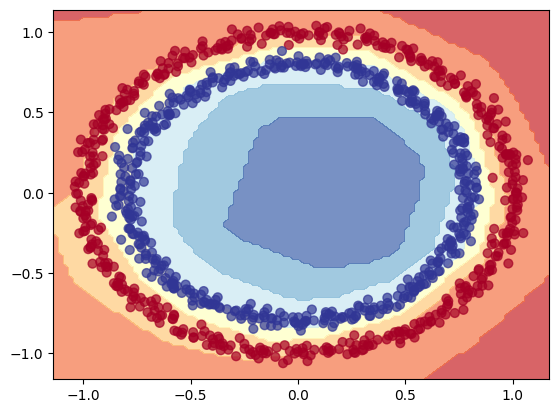

In [20]:
plot_deci_boundary(model, features, Labels)

In [16]:
tf.random.set_seed(42)

# Create the model
model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.Dense(4, activation='relu'))
model1.add(tf.keras.layers.Dense(4,  activation='relu'))
# model1.add(tf.keras.layers.Dense(5, activation='relu'))
model1.add(tf.keras.layers.Dense(1))

# Compile the model
model1.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics = ['accuracy']
)

model1.fit(features, Labels, epochs=20)

Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4529 - loss: 5.0642
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4508 - loss: 0.9555
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4501 - loss: 0.8169
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4549 - loss: 0.7601
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4551 - loss: 0.7217
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4743 - loss: 0.7032
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4972 - loss: 0.6868
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6034 - loss: 0.6677
Epoch 9/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7258 - loss: 0.6499
Epoch 10/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7620 - loss: 0.6406
Epoch 11/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7646 - loss: 0.6302
Epoch 12/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7793 - lo

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Doing binary classifiction


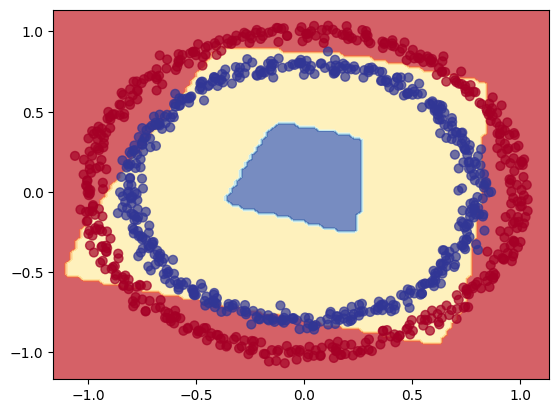

In [17]:
plot_deci_boundary(model1,features,Labels)

In [19]:
tf.random.set_seed(42)

# Create the model
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Dense(4, activation='relu'))
model2.add(tf.keras.layers.Dense(4,  activation='relu'))
# model1.add(tf.keras.layers.Dense(5, activation='relu'))
model2.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Compile the model
model2.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics = ['accuracy']
)

model2.fit(features, Labels, epochs=50)

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4813 - loss: 0.7166
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5064 - loss: 0.6898
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4989 - loss: 0.6900
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5081 - loss: 0.6880
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5133 - loss: 0.6868
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5243 - loss: 0.6832
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5331 - loss: 0.6798
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5450 - loss: 0.6735
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5493 - loss: 0.6626
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6096 - loss: 0.6452
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6625 - loss: 0.6224
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7176 - lo

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Doing binary classifiction


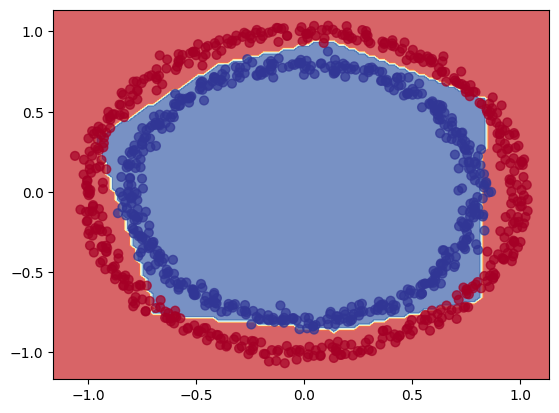

In [20]:
plot_deci_boundary(model2,features,Labels)